# Linear Regression with Multiple Variables
This section extends our previous linear regression model by using multiple features to predict trip prices.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df = pd.read_csv('taxi_trip_pricing.csv')


In [3]:
features = ['Trip_Distance_km', 'Trip_Duration_Minutes', 'Passenger_Count', 'Base_Fare', 'Per_Km_Rate', 'Per_Minute_Rate']
target = 'Trip_Price'


In [4]:
# Drop rows with missing values
df = df[features + [target]].dropna()


In [6]:
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((560, 6), (140, 6))

## Training the Multiple Linear Regression Model

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [8]:
print('Intercept:', model.intercept_)
print('Coefficients:', dict(zip(features, model.coef_)))

Intercept: -59.13577525655553
Coefficients: {'Trip_Distance_km': 1.8214252849090204, 'Trip_Duration_Minutes': 0.2902330600606899, 'Passenger_Count': 0.23024760040476322, 'Base_Fare': 0.6634828166213952, 'Per_Km_Rate': 23.81209133716475, 'Per_Minute_Rate': 58.47386547753698}


## Model Evaluation

In [9]:
y_pred = model.predict(X_test)

In [10]:
# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 149.76285214894182
R² Score: 0.7126524524148767


## Actual vs Predicted Prices

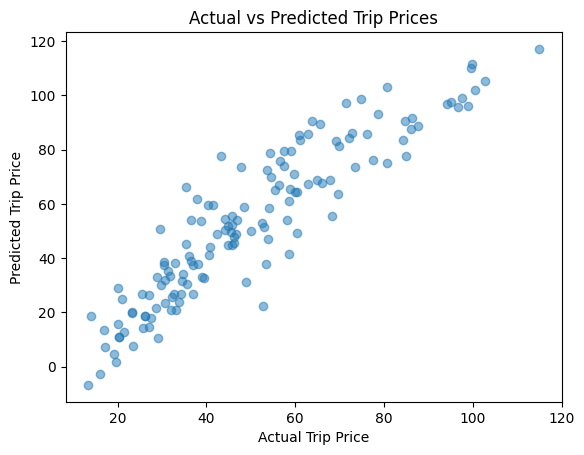

In [11]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Trip Price')
plt.ylabel('Predicted Trip Price')
plt.title('Actual vs Predicted Trip Prices')
plt.show()